In [7]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import plot, iplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from imblearn.metrics import sensitivity_score, specificity_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, f1_score, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


**M07 T01**

<u>*Exercice 1*<u>

*Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.*

The dataset to analyze is about the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

We have the following features:

-**Type of Wine:** This refers to the class, the three types of wines we are analyzing, thus, the target variable.


-**Alcohol:** Quantity of alcohol in *%*. Wine can have anywhere between 5% and 23% Alcohol by Volume (ABV).
The average alcohol content of wine is about 12%.


-**Malic acid:** Measured in *grams per liter*. Malic Acid provides a strong link to wines tasting ‘flat’ if there is not enough. If there is too much the wine will taste ‘sour’. It is vital that the levels of malic acid are monitored during the fermentation process. It is a kind of acid with strong acidity and apple aroma. The red wine is naturally accompanied by malic acid.


-**Ash:** Measured in *grams per liter*. On the average about 2.5 g/L of ash are found in wine. The essence of ash is an inorganic salt, which has an effect on the overall flavor of the wine and can give the wine a fresh feeling.


-**Alcalinity of ash:** expressed in *milliequivalents per litre* or in *grams per litre* of potassium carbonate.  It is a
measure of weak alkalinity dissolved in water.


-**Magnesium:** It is an essential element of the human body, which can promote energy metabolism and is weakly alkaline.


-**Total phenols:** molecules containing polyphenolic substances, which have a bitter taste and affect the taste, color and taste of the wine, and belong to the nutrients in the wine. Expressed in *g/L*.


-**Flavanoids:** It is a beneficial antioxidant for the heart and anti-aging, rich in aroma and bitter.


-**Nonflavanoid phenols:** It is a special aromatic gas with oxidation resistance and is weakly acidic.


-**Proanthocyanins:** It is a bioflavonoid compound, which is also a natural antioxidant with a slight bitter smell.


-**Color intensity:** Refers to the degree of color shade. It is used to measure the style of wine to be “light" or “thick". The color intensity is high, meanwhile the longer the wine and grape juice are in contact during the wine making process, the thicker the taste.


-**Hue:** refers to the vividness of the color and the degree of warmth and coldness. It can be used to measure the variety and age of the wine. Red wines with higher ages will have a yellow hue and increased transparency. Color intensity and hue are important indicators for evaluating the quality of a wine’s appearance. Expressed in *sexagesimal degrees*.


-**OD280/OD315 of diluted wines:** This is a method for determining the protein concentration, which can determine the protein content of various wines. 


-**Proline:** It is the main amino acid in red wine and an important part of the nutrition and flavor of wine. Red wine contains 300 to 1300 *mg/L* of the most abundant amino acid.



In [8]:
# read the file

pattern = ','

wines = pd.read_csv(r"C:\Users\Pereira\Documents\IT Academy\M07T01\wineData.txt", 
    sep=pattern,
    engine = 'python',
    na_values = '-',
    header = None,
    usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    names = ['Type of Wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
wines

Type of Wine  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0               1    14.23        1.71  2.43               15.6        127   
1               1    13.20        1.78  2.14               11.2        100   
2               1    13.16        2.36  2.67               18.6        101   
3               1    14.37        1.95  2.50               16.8        113   
4               1    13.24        2.59  2.87               21.0        118   
..            ...      ...         ...   ...                ...        ...   
173             3    13.71        5.65  2.45               20.5         95   
174             3    13.40        3.91  2.48               23.0        102   
175             3    13.27        4.28  2.26               20.0        120   
176             3    13.17        2.59  2.37               20.0        120   
177             3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

In [9]:
wines.isnull().sum()

Type of Wine                    0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [10]:
wines.dtypes

Type of Wine                      int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

All attributes are floats except Type of Wine, Magnesium and Proline, which are integers. There are no missing values in the data.

In [11]:
wines.describe()

Type of Wine     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count    178.000000  178.000000  178.000000  178.000000         178.000000   
mean       1.938202   13.000618    2.336348    2.366517          19.494944   
std        0.775035    0.811827    1.117146    0.274344           3.339564   
min        1.000000   11.030000    0.740000    1.360000          10.600000   
25%        1.000000   12.362500    1.602500    2.210000          17.200000   
50%        2.000000   13.050000    1.865000    2.360000          19.500000   
75%        3.000000   13.677500    3.082500    2.557500          21.500000   
max        3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

First, we check if it is a balanced dataset or not looking at the class distribution. It looks like its quite balanced.

In [12]:
wines['Type of Wine'].value_counts()

2    71
1    59
3    48
Name: Type of Wine, dtype: int64

<AxesSubplot:xlabel='Type of Wine', ylabel='count'>

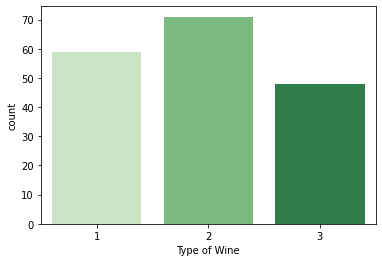

In [13]:
sns.countplot(data=wines, x="Type of Wine", palette='Greens')

Next we create a box plot for each feature of each wine type so we can see the differences between them.

In [14]:
type_1 = wines[wines["Type of Wine"] == 1]
type_2 = wines[wines["Type of Wine"] == 2]
type_3 = wines[wines["Type of Wine"] == 3]
def create_box_type_1_trace(col, visible=False):
    return go.Box(
        y=type_1[col],
        name='class 1',
        marker = dict(color = 'ForestGreen'),
        visible=visible,
    )

def create_box_type_2_trace(col, visible=False):
    return go.Box(
        y=type_2[col],
        name='class 2',
        marker = dict(color = 'LimeGreen'),
        visible = visible,
    )
def create_box_type_3_trace(col, visible=False):
    return go.Box(
        y=type_3[col],
        name='class 3',
        marker = dict(color = 'DarkGreen'),
        visible = visible,
    )
features_not_for_hist = ["Type of Wine"]
features_for_hist = [x for x in wines.columns if x not in features_not_for_hist]
# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(type_1[col].unique())>5 or len(type_2[col].unique())>5 or len(type_1[col].unique())>5]
#features_for_box = [col for col in features_for_hist]
active_idx = 0
box_traces_type_1 = [(create_box_type_1_trace(col) if i != active_idx else create_box_type_1_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
box_traces_type_2 = [(create_box_type_2_trace(col) if i != active_idx else create_box_type_2_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
box_traces_type_3 = [(create_box_type_3_trace(col) if i != active_idx else create_box_type_3_trace(col, visible=True)) for i, col in enumerate(features_for_box)]

wines_box = box_traces_type_1 + box_traces_type_2 + box_traces_type_3

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(wines_box)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
        ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = dict(data=wines_box, layout=layout)
#fig.show()
iplot(fig, filename='box_slider')

In [15]:
aux=wines[wines["Type of Wine"] == 1]

Q1 = aux.quantile(0.25)
Q3 = aux.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux < (Q1 - 1.5 * IQR)) |(aux > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)
outliers_perc = outliers_abs * 100 / aux.count(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')
print(f'% of outliers vs total:\n{outliers_perc}')

Total number of outliers:
Type of Wine                    0
Alcohol                         0
Malic acid                      9
Ash                             1
Alcalinity of ash               3
Magnesium                       0
Total phenols                   2
Flavanoids                      0
Nonflavanoid phenols            4
Proanthocyanins                 4
Color intensity                 1
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

% of outliers vs total:
Type of Wine                     0.000000
Alcohol                          0.000000
Malic acid                      15.254237
Ash                              1.694915
Alcalinity of ash                5.084746
Magnesium                        0.000000
Total phenols                    3.389831
Flavanoids                       0.000000
Nonflavanoid phenols             6.779661
Proanthocyanins                  6.779661
Color intensity                  1.69491

In [16]:
aux2=wines[wines["Type of Wine"] == 2]

Q1 = aux2.quantile(0.25)
Q3 = aux2.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux2 < (Q1 - 1.5 * IQR)) |(aux2 > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)
outliers_perc = outliers_abs * 100 / aux2.count(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')
print(f'% of outliers vs total:\n{outliers_perc}')

Total number of outliers:
Type of Wine                    0
Alcohol                         3
Malic acid                      7
Ash                             2
Alcalinity of ash               4
Magnesium                       5
Total phenols                   0
Flavanoids                      1
Nonflavanoid phenols            0
Proanthocyanins                 8
Color intensity                 4
Hue                             1
OD280/OD315 of diluted wines    0
Proline                         1
dtype: int64

% of outliers vs total:
Type of Wine                     0.000000
Alcohol                          4.225352
Malic acid                       9.859155
Ash                              2.816901
Alcalinity of ash                5.633803
Magnesium                        7.042254
Total phenols                    0.000000
Flavanoids                       1.408451
Nonflavanoid phenols             0.000000
Proanthocyanins                 11.267606
Color intensity                  5.63380

In [17]:
aux3=wines[wines["Type of Wine"] == 3]

Q1 = aux3.quantile(0.25)
Q3 = aux3.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux3 < (Q1 - 1.5 * IQR)) |(aux3 > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)
outliers_perc = outliers_abs * 100 / aux3.count(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')
print(f'% of outliers vs total:\n{outliers_perc}')

Total number of outliers:
Type of Wine                    0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   2
Flavanoids                      1
Nonflavanoid phenols            1
Proanthocyanins                 2
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    2
Proline                         0
dtype: int64

% of outliers vs total:
Type of Wine                    0.000000
Alcohol                         0.000000
Malic acid                      0.000000
Ash                             0.000000
Alcalinity of ash               0.000000
Magnesium                       0.000000
Total phenols                   4.166667
Flavanoids                      2.083333
Nonflavanoid phenols            2.083333
Proanthocyanins                 4.166667
Color intensity                 0.000000
Hue      

We can see that the type of wine with more outliers in general is 2.


-*Alcohol:* type 1 is the wine with more alcohol quantity and type 2 the one with less alcohol quantity.


-*Malic Acid:* type 3 is the wine with more malic acid quantity and type 1 the one with less, although it has many outliers.


-*Ash:* the 3 types have more or less the same amount of ash (type 1 is the one with more ash and type 2 the one with less), but type 2 has more outliers.


-*Alcalinity of ash:* type 3 is the wine with more alcalinity of ash and type 1 the one with less.

-*Magnesium:* type 1 has more magnesium than the others, and type 2 is the wine with less quantity of magnesium (with many outliers).

-*Total phenols:* type 1 has more phenols than the others, and type 3 is the wine with less phenols. There are just a few outliers in this feature, divided between type 1 and type 3.

-*Flavanoids:* there is a big difference between the quantity of flavanoids in type 1 (the one with more) and type 3 (the one with less). Almost no outliers in this feature.

-*Nonflavanoids:* on the contrary, type 3 is the one with more non flavanoids and type 1 the one with less. Just a few outliers.

-*Proanthocyanins:* type 1 and type 2 have more or less the same proanthocyanins quantity. Type 3 is the wine with less. Many outliers in type 2, though.

-*Color intensity:* type 3 is the wine with more color intensity with a huge difference above type 2, that again has many outliers.

-*Hue:* type 2 is the wine with more hue and type 3 the one with less. Almost no outliers.

-*OD280/OD315:* there is a big difference between the quantity of flavanoids in type 1 (the one with more) and type 3 (the one with less). Almost no outliers in this feature.

-*Proline:* type 1 is the wine with more proline, types 2 and 3 have almost the same quantity. Almost no outliers in this feature.

We check the correlation between features.

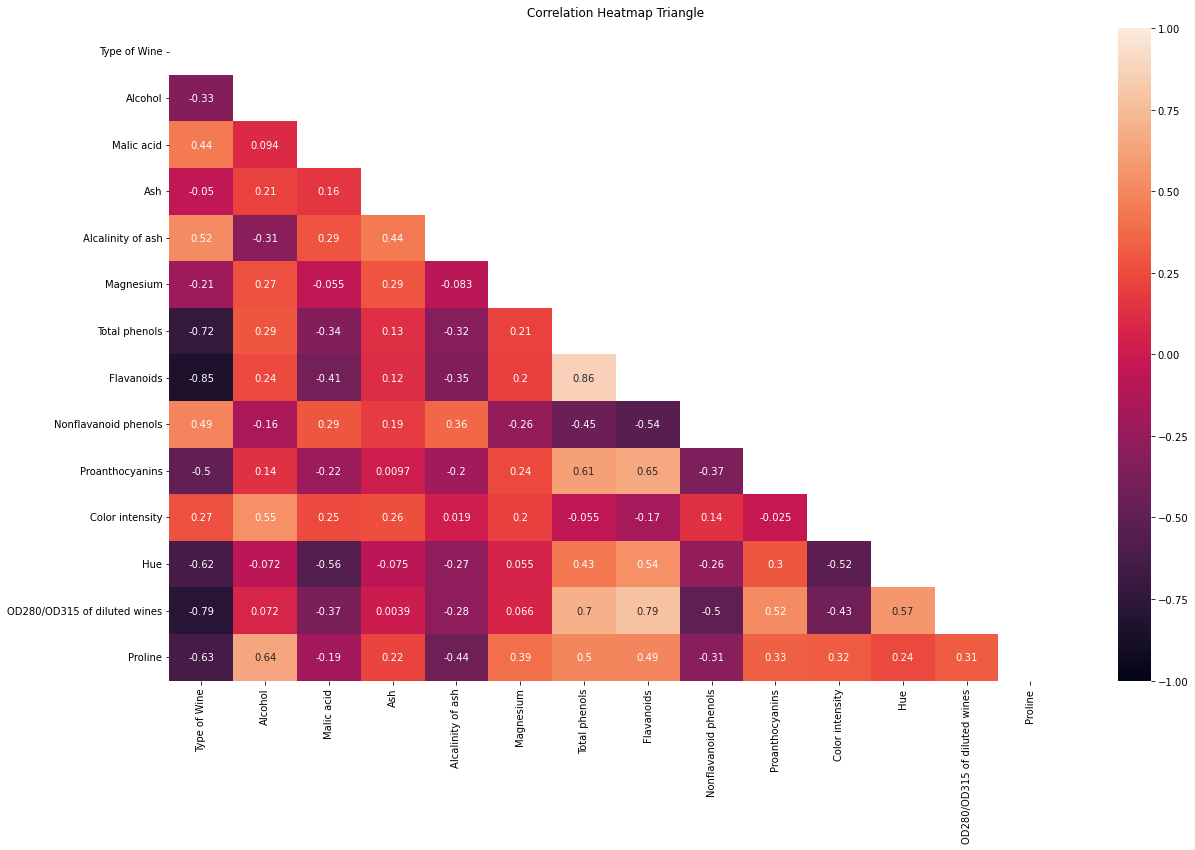

In [18]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 12))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(wines.corr(), vmin=-1, vmax=1, annot=True, mask= np.triu(wines.corr()))
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap Triangle', fontdict={'fontsize':12}, pad=12);

Obviously, the stronger correlations include the type of wine. Flavanoids and OD280/OD315 are the most correlated features with the type of wine.

We check the skew of the variables in order to decide which feature engineering to perform later. We can se that malic acid, magnesium and OD280/OD315 of diluted wines are some of the variables with less normal distribution so we will use them.

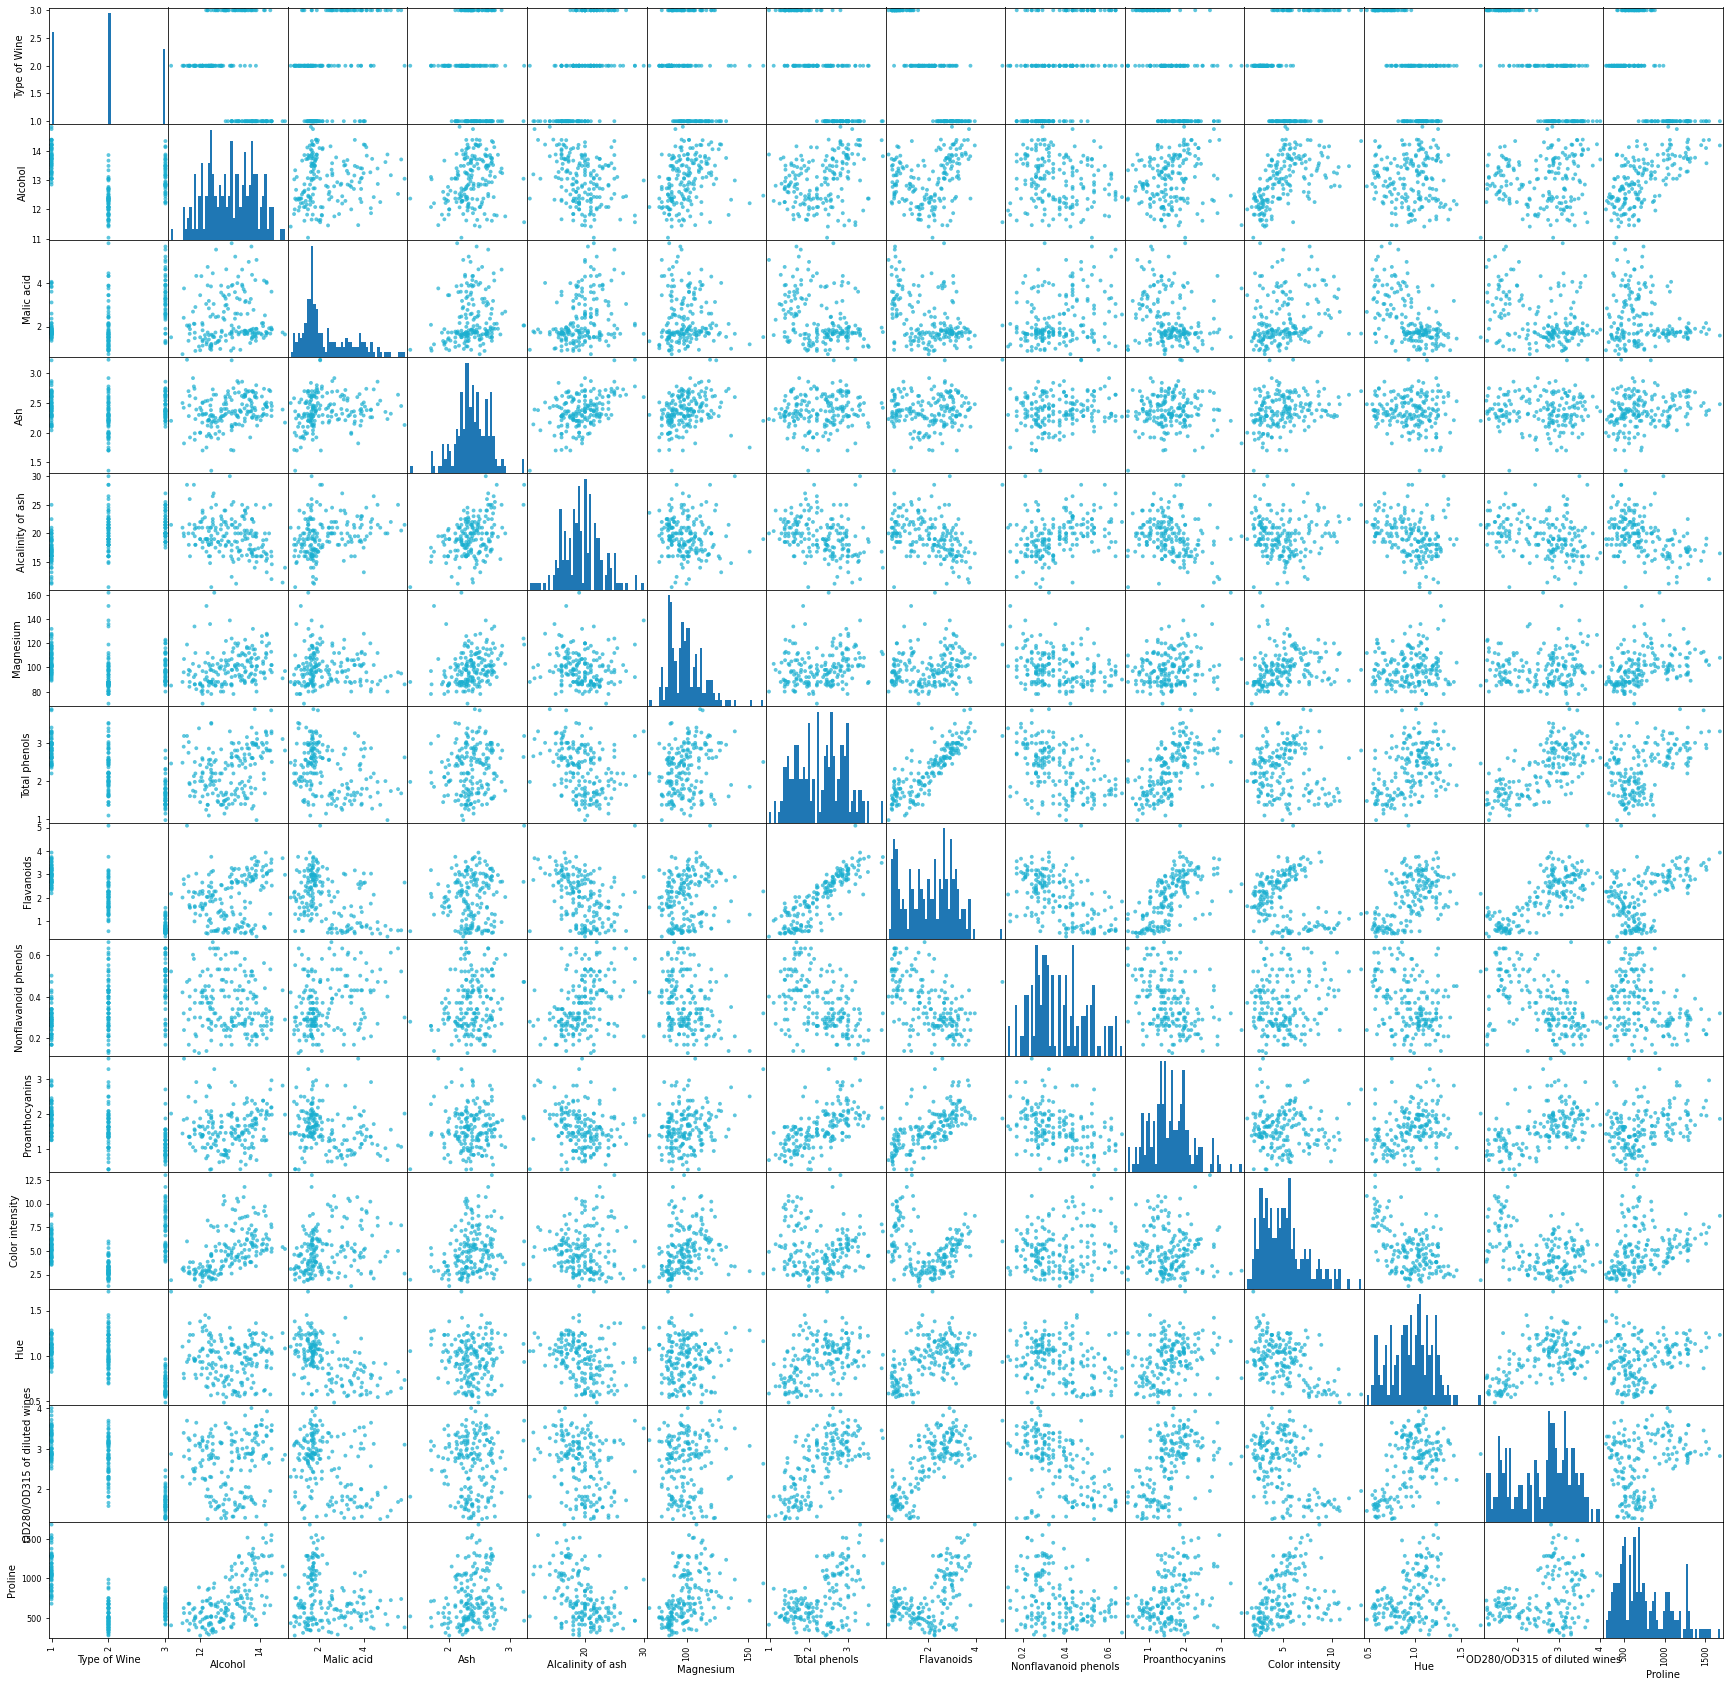

In [19]:
pd.plotting.scatter_matrix(wines , figsize= (30,30),  hist_kwds = {'bins': 50}, alpha = 0.7 , color = '#1aafd0', s = 60); 

<u>*Exercice 2*<u>

*Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.*

First of all, we normalize our explained features because we will need it for the support vector machine model. We use Standard Scaler which standardize features by removing the mean and scaling to unit variance.

In [20]:
normalized_features_ss = ['Alcohol', 'Total phenols', 'Hue', 'Proline']

wines_scaled = wines.copy()
scaler = StandardScaler()
wines_scaled[normalized_features_ss] = scaler.fit_transform(wines_scaled[normalized_features_ss])
wines_scaled

Type of Wine   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0               1  1.518613        1.71  2.43               15.6        127   
1               1  0.246290        1.78  2.14               11.2        100   
2               1  0.196879        2.36  2.67               18.6        101   
3               1  1.691550        1.95  2.50               16.8        113   
4               1  0.295700        2.59  2.87               21.0        118   
..            ...       ...         ...   ...                ...        ...   
173             3  0.876275        5.65  2.45               20.5         95   
174             3  0.493343        3.91  2.48               23.0        102   
175             3  0.332758        4.28  2.26               20.0        120   
176             3  0.209232        2.59  2.37               20.0        120   
177             3  1.395086        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0         0.808997        3.06                  0.28             2.29   
1         0.568648        2.76                  0.26             1.28   
2         0.808997        3.24                  0.30             2.81   
3         2.491446        3.49                  0.24             2.18   
4         0.808997        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173      -0.985614        0.61                  0.52             1.06   
174      -0.793334        0.75                  0.43             1.41   
175      -1.129824        0.69                  0.43             1.35   
176      -1.033684        0.68                  0.53             1.46   
177      -0.392751        0.76                  0.56             1.35   

     Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0               5.64  0.362177                          3.92  1.013009  
1               4.38  0.406051                          3.40  0.965242  
2               5.68  0.318304                          3.17  1.395148  
3               7.80 -0.427544                          3.45  2.334574  
4               4.32  0.362177                          2.93 -0.037874  
..               ...       ...                           ...       ...  
173             7.70 -1.392758                          1.74 -0.021952  
174             7.30 -1.129518                          1.56  0.009893  
175            10.20 -1.612125                          1.56  0.280575  
176             9.30 -1.568252                          1.62  0.296498  
177             9.20 -1.524378                          1.60 -0.595160  

[178 rows x 14 columns]

We will use the most important metrics to compare the different models:

-**confusion matrix**

The Confusion Matrix created has four different quadrants:

True Negative (Top-Left Quadrant)


False Negative (Top-Right Quadrant)


False Positive (Bottom-Left Quadrant)


True Positive (Bottom-Right Quadrant)


True means that the values were accurately predicted, False means that there was an error or wrong prediction.

-correct predictions / total predictions


**accuracy** = (TP+TN)/(TP+FP+FN+TN)



-correct positive predictions / total positive predictions 


**precision** = TP/(TP+FP)



-correct positive predictions / total positives


**sensitivity (or recall)** = TP/(TP+FN)



-correct negative predictions / total negatives


**specificity** = TN / (TN + FP)



-f1 score


**f1_score** = 2 x (recall x precision) / (recall + precision)

In [21]:
#choose dependent (or target) variable 
y = wines_scaled['Type of Wine']
#choose independent variable 
X = wines_scaled[['Alcohol', 'Total phenols', 'Hue', 'Proline']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<u>Decision Tree<u>

In [23]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_clf = dt_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

In [24]:
#Get the confusion matrix
cf_matrix_dt = confusion_matrix(y_test, y_pred_test)
print(cf_matrix_dt)

[[18  1  0]
 [ 0 21  1]
 [ 0  2 11]]


Text(0.5, 257.44, 'Predicted label')

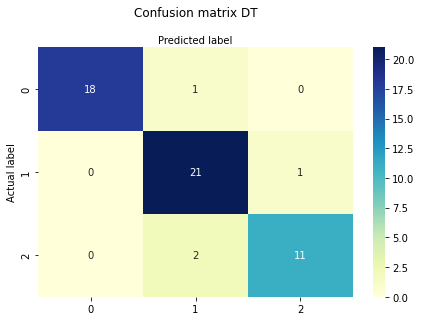

In [25]:
class_names=["Type 1", "Type 2", "Type 3"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
ac_dt = metrics.accuracy_score(y_test, y_pred_test)
pre_dt = metrics.precision_score(y_test, y_pred_test, average='macro')
r_dt = metrics.recall_score(y_test, y_pred_test, average='macro')
f1_dt = metrics.f1_score(y_test, y_pred_test, average='macro')
spe_dt = specificity_score(y_test, y_pred_test, average='macro')

In [27]:
print("Accuracy:", ac_dt)
print("Precision:", pre_dt)
print("Recall:", r_dt)
print("F1:", f1_dt)
print("Specificity:",spe_dt)

Accuracy: 0.9259259259259259
Precision: 0.9305555555555555
Recall: 0.9160225739173108
F1: 0.9220054837446141
Specificity: 0.960619918699187


<u> Logistic Regression<u>

In [28]:
logreg = LogisticRegression(max_iter = 1000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred2=logreg.predict(X_train)
y_pred2_test = logreg.predict(X_test)

In [29]:
#Get the confusion matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred2_test)
print(cf_matrix_lr)

[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]


Text(0.5, 257.44, 'Predicted label')

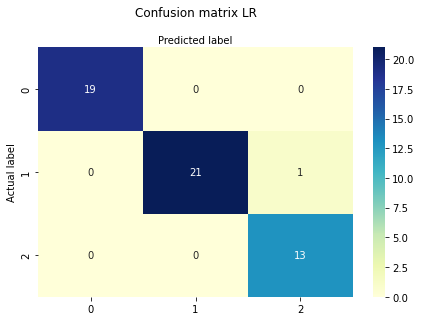

In [30]:
class_names=["Type 1", "Type 2", "Type 3"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix LR', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
ac_lr = metrics.accuracy_score(y_test, y_pred2_test)
pre_lr = metrics.precision_score(y_test, y_pred2_test, average='macro')
r_lr = metrics.recall_score(y_test, y_pred2_test, average='macro')
f1_lr = metrics.f1_score(y_test, y_pred2_test, average='macro')
spe_lr = specificity_score(y_test, y_pred2_test, average='macro')

In [32]:
print("Accuracy:",ac_lr)
print("Precision:",pre_lr)
print("Recall:",r_lr)
print("F1:",f1_lr)
print("Specificity:",spe_lr)

Accuracy: 0.9814814814814815
Precision: 0.9761904761904763
Recall: 0.9848484848484849
F1: 0.9799023830031581
Specificity: 0.991869918699187


<u> Suppport Vector Machine<u>

In [33]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred3 = svm_clf.predict(X_train)
y_pred3_test = svm_clf.predict(X_test)


In [34]:
#Get the confusion matrix
cf_matrix_svm = confusion_matrix(y_test, y_pred3_test)
print(cf_matrix_svm)

[[19  0  0]
 [ 1 20  1]
 [ 0  0 13]]


Text(0.5, 257.44, 'Predicted label')

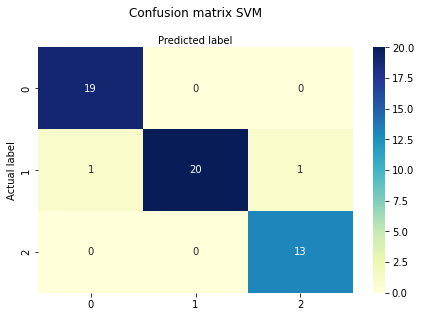

In [35]:
class_names=["Type 1", "Type 2", "Type 3"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [36]:
ac_svm = metrics.accuracy_score(y_test, y_pred3_test)
pre_svm = metrics.precision_score(y_test, y_pred3_test, average='macro')
r_svm = metrics.recall_score(y_test, y_pred3_test, average='macro')
f1_svm = metrics.f1_score(y_test, y_pred3_test, average='macro')
spe_svm = specificity_score(y_test, y_pred3_test, average='macro')

In [37]:
print("Accuracy:",ac_svm)
print("Precision:",pre_svm)
print("Recall:",r_svm)
print("F1:",f1_svm)
print("Specificity:",spe_svm)

Accuracy: 0.9629629629629629
Precision: 0.9595238095238096
Recall: 0.9696969696969697
F1: 0.9632342965676299
Specificity: 0.9823461091753775


In [38]:
data={'Model':['Decision Tree', 'Logistic Regression', 'Support Vector Machine'], 
      'Type':['DT', 'LR', 'SVM'], 
      'Accuracy':[ac_dt, ac_lr, ac_svm], 
      'Precision':[pre_dt, pre_lr, pre_svm], 
      'Recall':[r_dt, r_lr, r_svm], 
      'F1_score':[f1_dt, f1_lr, f1_svm],
      'Specificity':[spe_dt, spe_lr, spe_svm]}
reg_metrics=pd.DataFrame(data)
reg_metrics

Model Type  Accuracy  Precision    Recall  F1_score  \
0           Decision Tree   DT  0.925926   0.930556  0.916023  0.922005   
1     Logistic Regression   LR  0.981481   0.976190  0.984848  0.979902   
2  Support Vector Machine  SVM  0.962963   0.959524  0.969697  0.963234   

   Specificity  
0     0.960620  
1     0.991870  
2     0.982346

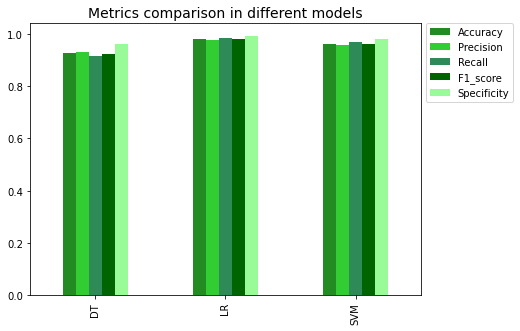

In [39]:
reg_metrics2 = reg_metrics.set_index('Type')
ax = reg_metrics2[['Accuracy', 'Precision', 'Recall', 'F1_score', 'Specificity']].plot(kind='bar', figsize=(7, 5), color = ['Forestgreen', 'Limegreen', 'Seagreen', 'Darkgreen', 'Palegreen'])
ax.set_title('Metrics comparison in different models', fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

In [40]:
y_proba = logreg.predict_proba(X_test)

def get_all_roc_coordinates(y, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred_svm = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y, y_pred_svm)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [41]:
def calculate_tpr_fpr(y, y_pred_svm):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y, y_pred_svm)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [42]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

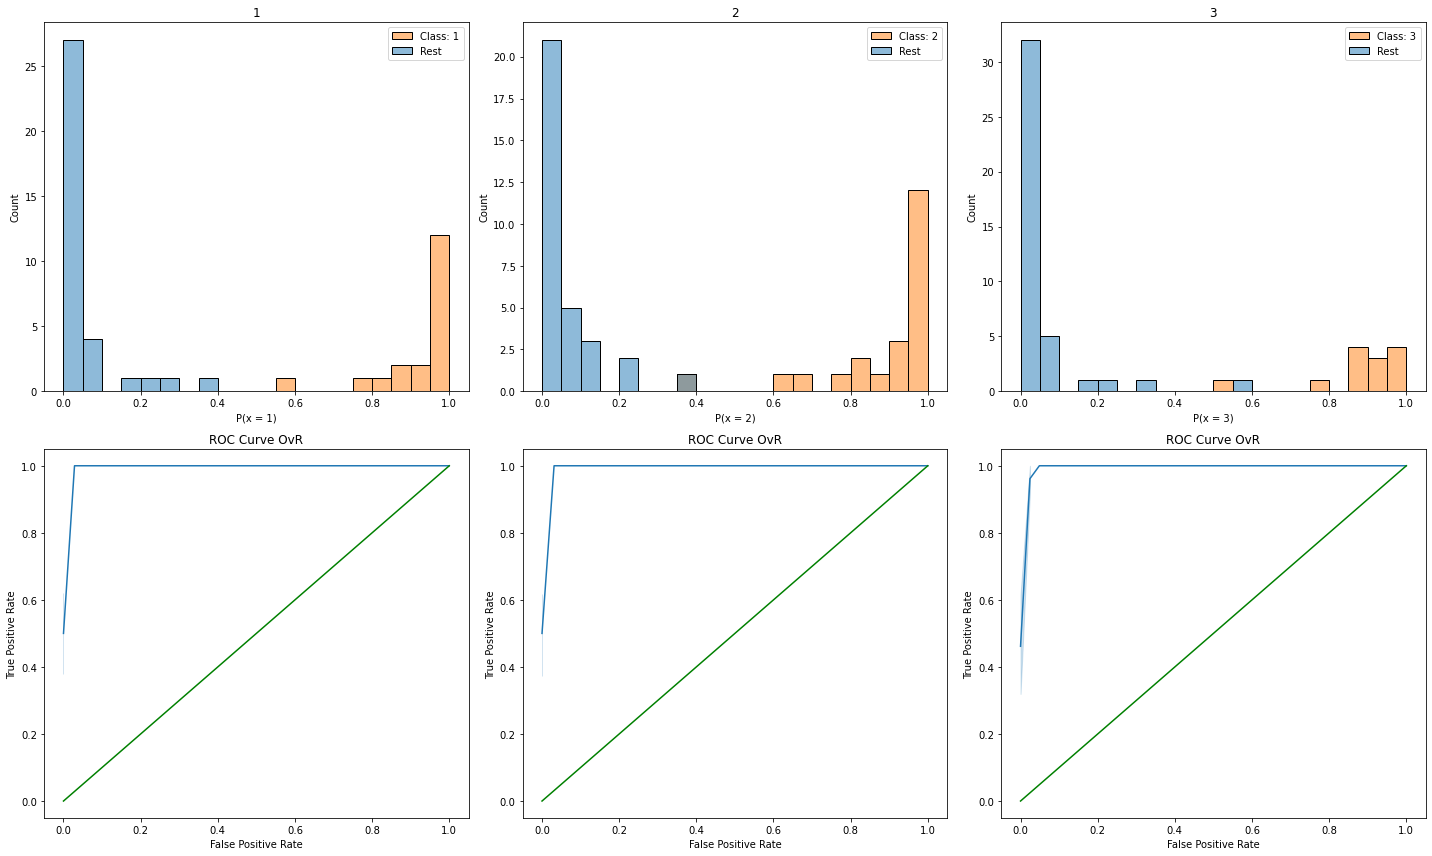

In [43]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (20, 12))
bins = [i/20 for i in range(20)] + [1]
classes = svm_clf.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [44]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

1 ROC AUC OvR: 1.0000
2 ROC AUC OvR: 1.0000
3 ROC AUC OvR: 0.9981
average ROC AUC OvR: 0.9994


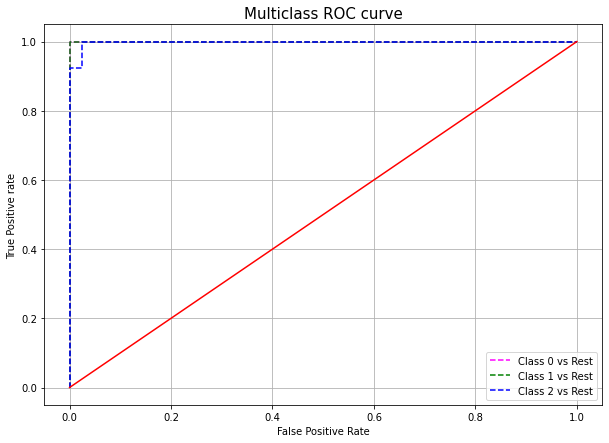

In [45]:
import matplotlib.pyplot as plt

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

# defining number of classes 
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_proba[:,i], pos_label=i+1)
    
# plotting    
plt.figure(figsize = (10,7))
plt.plot(fpr[0], tpr[0], linestyle='--',color='magenta', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color = 'red')
plt.title('Multiclass ROC curve', fontsize = 15)
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()  

The model predicts perfectly Class 0 and Class 1 and almost perfectly Class 2 (that we already saw it is the one with more outliers).

<u>*Exercice 3*<u>

*Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.*

<u>Decision Tree <u>

In [46]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [47]:
#dictionary of search space
space = dict()
space['class_weight'] = [None, 'balanced' ]
space['criterion'] = ['gini', 'entropy', 'log_loss']

search = GridSearchCV(dt_clf, space)

result = search.fit(X_train, y_train)

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'class_weight': 'balanced', 'criterion': 'gini'}


In [48]:
dt_clf_adj = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini')

In [49]:
dt_clf_adj.fit(X_train, y_train)
y_pred_adj = dt_clf_adj.predict(X_train)
y_pred_test_adj = dt_clf_adj.predict(X_test)

In [50]:
#Get the confusion matrix
cf_matrix_dt_adj = confusion_matrix(y_test, y_pred_test_adj)
print(cf_matrix_dt_adj)

[[18  1  0]
 [ 1 21  0]
 [ 1  3  9]]


Text(0.5, 257.44, 'Predicted label')

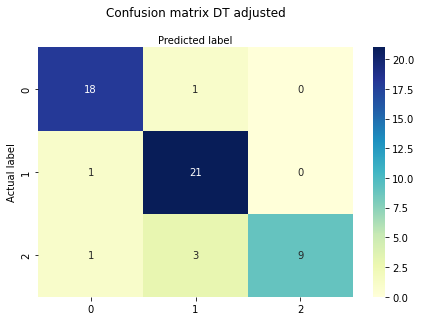

In [51]:
class_names=["Type 1", "Type 2", "Type 3"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_dt_adj), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT adjusted', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
ac_dt_adj = metrics.accuracy_score(y_test, y_pred_test_adj)
pre_dt_adj = metrics.precision_score(y_test, y_pred_test_adj, average='macro')
r_dt_adj = metrics.recall_score(y_test, y_pred_test_adj, average='macro')
f1_dt_adj = metrics.f1_score(y_test, y_pred_test_adj, average='macro')
spe_dt_adj = specificity_score(y_test, y_pred_test_adj, average='macro')

In [53]:
print("Accuracy:", ac_dt_adj)
print("Precision:", pre_dt_adj)
print("Recall:", r_dt_adj)
print("F1:", f1_dt_adj)
print("Specificity:",spe_dt_adj)

Accuracy: 0.8888888888888888
Precision: 0.9133333333333334
Recall: 0.8647405226352595
F1: 0.8782919208451124
Specificity: 0.9392857142857144


<u>Logistic Regression<u>

In [54]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [55]:
#dictionary of search space
space = dict()
space['penalty'] = ['l2', 'l1','elasticnet']
space['max_iter'] = [1000, 1500]
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['dual'] = [True, False]

search = GridSearchCV(logreg, space)

result = search.fit(X_train, y_train)

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'dual': True, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\Pereira\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


220 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pereira\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pereira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1094, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pereira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 66, in _check_solver
    raise ValueE

In [56]:
logreg_adj = LogisticRegression(dual = True, max_iter = 1000, penalty = 'l2', solver = 'liblinear')

In [57]:
logreg_adj.fit(X_train, y_train)
y_pred2_adj = logreg_adj.predict(X_train)
y_pred2_test_adj = logreg_adj.predict(X_test)

In [58]:
#Get the confusion matrix
cf_matrix_logreg_adj = confusion_matrix(y_test, y_pred2_test_adj)
print(cf_matrix_logreg_adj)

[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]


Text(0.5, 257.44, 'Predicted label')

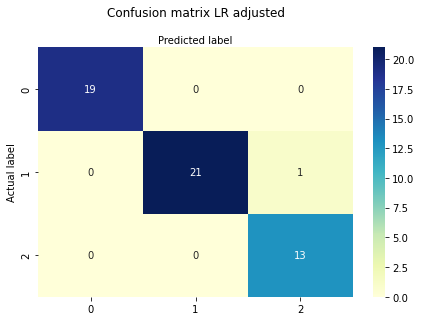

In [59]:
class_names=["Type 1", "Type 2", "Type 3"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_logreg_adj), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix LR adjusted', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
ac_lr_adj = metrics.accuracy_score(y_test, y_pred2_test_adj)
pre_lr_adj = metrics.precision_score(y_test, y_pred2_test_adj, average='macro')
r_lr_adj = metrics.recall_score(y_test, y_pred2_test_adj, average='macro')
f1_lr_adj = metrics.f1_score(y_test, y_pred2_test_adj, average='macro')
spe_lr_adj = specificity_score(y_test, y_pred2_test_adj, average='macro')

In [61]:
print("Accuracy:", ac_lr_adj)
print("Precision:", pre_lr_adj)
print("Recall:", r_lr_adj)
print("F1:", f1_lr_adj)
print("Specificity:",spe_lr_adj)

Accuracy: 0.9814814814814815
Precision: 0.9761904761904763
Recall: 0.9848484848484849
F1: 0.9799023830031581
Specificity: 0.991869918699187


<u>SVM<u>

In [62]:
svm_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [63]:
#dictionary of search space
space = dict()
space['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
space['gamma'] = ['scale', 'auto']
space['class_weight'] = ['dict', 'balanced', None]

search = GridSearchCV(svm_clf, space)

result = search.fit(X_train, y_train)

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'class_weight': None, 'gamma': 'scale', 'kernel': 'sigmoid'}


C:\Users\Pereira\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pereira\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pereira\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 182, in fit
    y = self._validate_targets(y)
  File "C:\Users\Pereira\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 737, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight, class

In [64]:
svm_clf_adj = svm.SVC(class_weight = None, gamma = 'scale', kernel = 'sigmoid')

In [65]:
svm_clf_adj.fit(X_train, y_train);
y_pred3_adj = svm_clf_adj.predict(X_train)
y_pred3_test_adj = svm_clf_adj.predict(X_test)

In [66]:
#Get the confusion matrix
cf_matrix_svm_adj = confusion_matrix(y_test, y_pred3_test_adj)
print(cf_matrix_svm_adj)

[[19  0  0]
 [ 1 21  0]
 [ 0  0 13]]


Text(0.5, 257.44, 'Predicted label')

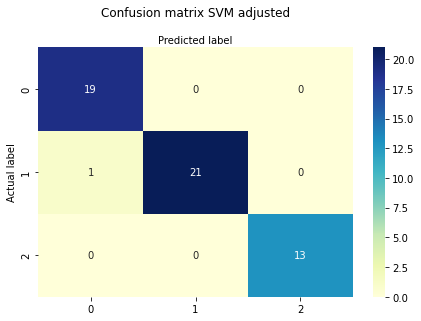

In [67]:
class_names=["Type 1", "Type 2", "Type 3"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_svm_adj), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM adjusted', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
ac_svm_adj = metrics.accuracy_score(y_test, y_pred3_test_adj)
pre_svm_adj = metrics.precision_score(y_test, y_pred3_test_adj, average='macro')
r_svm_adj = metrics.recall_score(y_test, y_pred3_test_adj, average='macro')
f1_svm_adj = metrics.f1_score(y_test, y_pred3_test_adj, average='macro')
spe_svm_adj = specificity_score(y_test, y_pred3_test_adj, average='macro')

In [69]:
print("Accuracy:", ac_svm_adj)
print("Precision:", pre_svm_adj)
print("Recall:", r_svm_adj)
print("F1:", f1_svm_adj)
print("Specificity:",spe_svm_adj)

Accuracy: 0.9814814814814815
Precision: 0.9833333333333334
Recall: 0.9848484848484849
F1: 0.9837010534684953
Specificity: 0.9904761904761905


In [70]:
data2={'Model':['Decision Tree Adj','Logistic Regression Adj', 'Support Vector Machine Adj'], 
      'Type':['DTAdj', 'LRAdj', 'SVMAdj'], 
      'Accuracy':[ac_dt_adj, ac_lr_adj, ac_svm_adj], 
      'Precision':[pre_dt_adj, pre_lr_adj, pre_svm_adj], 
      'Recall':[r_dt_adj, r_lr_adj, r_svm_adj], 
      'F1_score':[f1_dt_adj, f1_lr_adj, f1_svm_adj],
      'Specificity':[spe_dt_adj, spe_lr_adj, spe_svm_adj]}
reg_metrics2=pd.DataFrame(data2)
reg_metrics2

Model    Type  Accuracy  Precision    Recall  \
0           Decision Tree Adj   DTAdj  0.888889   0.913333  0.864741   
1     Logistic Regression Adj   LRAdj  0.981481   0.976190  0.984848   
2  Support Vector Machine Adj  SVMAdj  0.981481   0.983333  0.984848   

   F1_score  Specificity  
0  0.878292     0.939286  
1  0.979902     0.991870  
2  0.983701     0.990476

In [71]:
reg_metrics

Model Type  Accuracy  Precision    Recall  F1_score  \
0           Decision Tree   DT  0.925926   0.930556  0.916023  0.922005   
1     Logistic Regression   LR  0.981481   0.976190  0.984848  0.979902   
2  Support Vector Machine  SVM  0.962963   0.959524  0.969697  0.963234   

   Specificity  
0     0.960620  
1     0.991870  
2     0.982346

In [72]:
clf_metrics = pd.concat([reg_metrics, reg_metrics2], axis=0, ignore_index = True)
clf_metrics

Model    Type  Accuracy  Precision    Recall  \
0               Decision Tree      DT  0.925926   0.930556  0.916023   
1         Logistic Regression      LR  0.981481   0.976190  0.984848   
2      Support Vector Machine     SVM  0.962963   0.959524  0.969697   
3           Decision Tree Adj   DTAdj  0.888889   0.913333  0.864741   
4     Logistic Regression Adj   LRAdj  0.981481   0.976190  0.984848   
5  Support Vector Machine Adj  SVMAdj  0.981481   0.983333  0.984848   

   F1_score  Specificity  
0  0.922005     0.960620  
1  0.979902     0.991870  
2  0.963234     0.982346  
3  0.878292     0.939286  
4  0.979902     0.991870  
5  0.983701     0.990476

In [73]:
clf_metrics2 = clf_metrics.reindex([0,3,1,4,2,5])
clf_metrics2.reset_index(drop=True, inplace=True)
clf_metrics2

Model    Type  Accuracy  Precision    Recall  \
0               Decision Tree      DT  0.925926   0.930556  0.916023   
1           Decision Tree Adj   DTAdj  0.888889   0.913333  0.864741   
2         Logistic Regression      LR  0.981481   0.976190  0.984848   
3     Logistic Regression Adj   LRAdj  0.981481   0.976190  0.984848   
4      Support Vector Machine     SVM  0.962963   0.959524  0.969697   
5  Support Vector Machine Adj  SVMAdj  0.981481   0.983333  0.984848   

   F1_score  Specificity  
0  0.922005     0.960620  
1  0.878292     0.939286  
2  0.979902     0.991870  
3  0.979902     0.991870  
4  0.963234     0.982346  
5  0.983701     0.990476

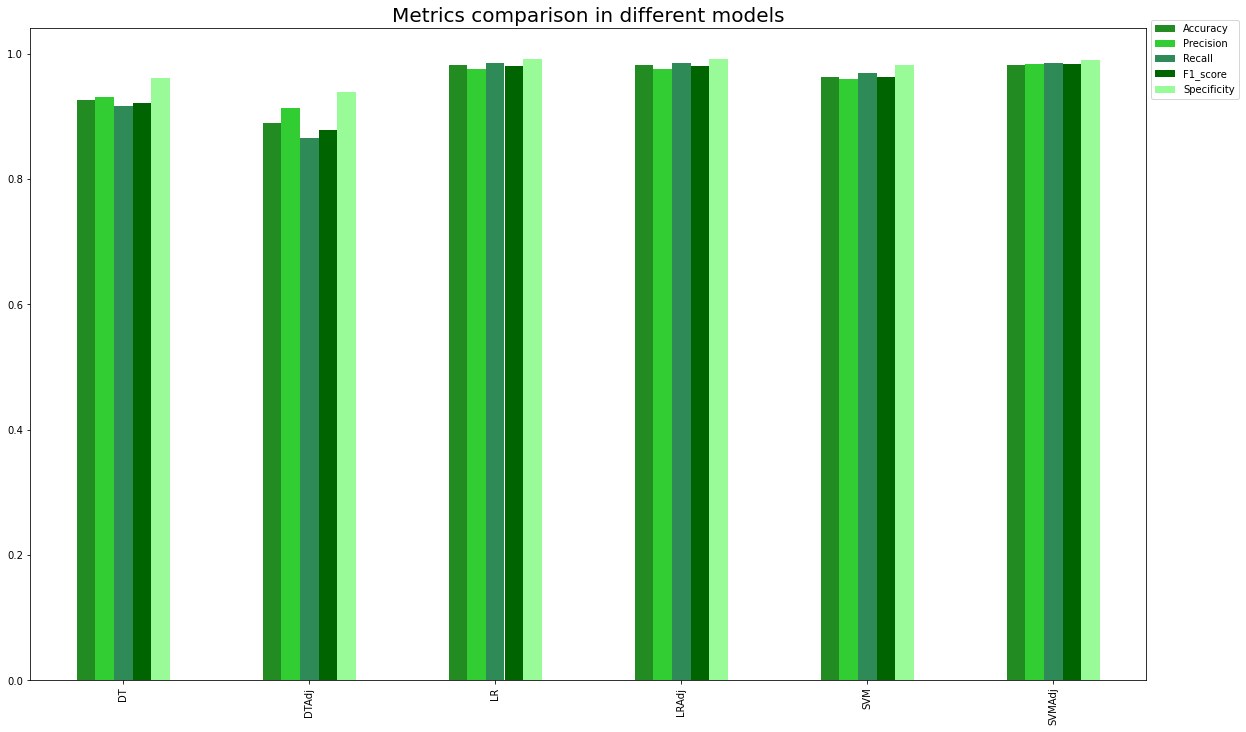

In [74]:
clf_metrics3 = clf_metrics2.set_index('Type')
ax = clf_metrics3[['Accuracy', 'Precision', 'Recall', 'F1_score', 'Specificity']].plot(kind='bar', figsize=(20, 12), color = ['Forestgreen', 'Limegreen', 'Seagreen', 'Darkgreen', 'Palegreen'])
ax.set_title('Metrics comparison in different models', fontsize = 20)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

<u>Exercice 4<u>

*Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.*

In [75]:
# apply cross validation for f1_score

ac_cv_dt_adj = cross_val_score(dt_clf_adj, X, y, scoring = "accuracy", cv = 20)
pre_cv_dt_adj = cross_val_score(dt_clf_adj, X, y, scoring = "precision_macro", cv = 20)
r_cv_dt_adj = cross_val_score(dt_clf_adj, X, y, scoring = "recall_macro", cv = 2)
f1_cv_dt_adj = cross_val_score(dt_clf_adj, X, y, scoring = "f1_macro", cv = 20)


ac_cv_lr_adj = cross_val_score(logreg_adj, X, y, scoring = "accuracy", cv = 10)
pre_cv_lr_adj = cross_val_score(logreg_adj, X, y, scoring = "precision_macro", cv = 10)
r_cv_lr_adj = cross_val_score(logreg_adj, X, y, scoring = "recall_macro", cv = 10)
f1_cv_lr_adj = cross_val_score(logreg_adj, X, y, scoring = "f1_macro", cv = 10)


ac_cv_svm_adj = cross_val_score(svm_clf_adj, X, y, scoring = "accuracy", cv = 2)
pre_cv_svm_adj = cross_val_score(svm_clf_adj, X, y, scoring = "precision_macro", cv = 2)
r_cv_svm_adj = cross_val_score(svm_clf_adj, X, y, scoring = "recall_macro", cv = 2)
f1_cv_svm_adj = cross_val_score(svm_clf_adj, X, y, scoring = "f1_macro", cv = 2)


In [76]:
ac_cv_dt_adj = (abs(np.mean(ac_cv_dt_adj)).round(4))
ac_cv_dt_adj

0.8826

In [77]:
pre_cv_dt_adj = (abs(np.mean(pre_cv_dt_adj)).round(4))
pre_cv_dt_adj

0.9145

In [78]:
r_cv_dt_adj = (abs(np.mean(r_cv_dt_adj)).round(4))
r_cv_dt_adj

0.8592

In [79]:
f1_cv_dt_adj = (abs(np.mean(f1_cv_dt_adj)).round(4))
f1_cv_dt_adj

0.8898

In [80]:
ac_cv_lr_adj = (abs(np.mean(ac_cv_lr_adj)).round(4))
ac_cv_lr_adj

0.9327

In [81]:
pre_cv_lr_adj = (abs(np.mean(pre_cv_lr_adj)).round(4))
pre_cv_lr_adj

0.9337

In [82]:
r_cv_lr_adj = (abs(np.mean(r_cv_lr_adj)).round(4))
r_cv_lr_adj

0.9373

In [83]:
f1_cv_lr_adj = (abs(np.mean(f1_cv_lr_adj)).round(4))
f1_cv_lr_adj

0.9317

In [84]:
ac_cv_svm_adj = (abs(np.mean(ac_cv_svm_adj)).round(4))
ac_cv_svm_adj

0.9157

In [85]:
pre_cv_svm_adj = (abs(np.mean(pre_cv_svm_adj)).round(4))
pre_cv_svm_adj

0.9181

In [86]:
r_cv_svm_adj = (abs(np.mean(r_cv_svm_adj)).round(4))
r_cv_svm_adj

0.9251

In [87]:
f1_cv_svm_adj = (abs(np.mean(f1_cv_svm_adj)).round(4))
f1_cv_svm_adj

0.9163

In [88]:
clf_metrics_cv = clf_metrics2.copy()
clf_metrics_cv

Model    Type  Accuracy  Precision    Recall  \
0               Decision Tree      DT  0.925926   0.930556  0.916023   
1           Decision Tree Adj   DTAdj  0.888889   0.913333  0.864741   
2         Logistic Regression      LR  0.981481   0.976190  0.984848   
3     Logistic Regression Adj   LRAdj  0.981481   0.976190  0.984848   
4      Support Vector Machine     SVM  0.962963   0.959524  0.969697   
5  Support Vector Machine Adj  SVMAdj  0.981481   0.983333  0.984848   

   F1_score  Specificity  
0  0.922005     0.960620  
1  0.878292     0.939286  
2  0.979902     0.991870  
3  0.979902     0.991870  
4  0.963234     0.982346  
5  0.983701     0.990476

In [89]:
new_row1 = {'Model': 'Decision Tree CV', 'Type': 'DTCV', 'Accuracy':ac_cv_dt_adj , 'Precision':pre_cv_dt_adj ,'Recall': r_cv_dt_adj,'F1_score':f1_cv_dt_adj, 'Specificity': '-'}
new_row2 = {'Model': 'Logistic Regression CV', 'Type': 'LRCV', 'Accuracy':ac_cv_lr_adj , 'Precision':pre_cv_lr_adj ,'Recall': r_cv_lr_adj,'F1_score':f1_cv_lr_adj,  'Specificity': '-'}
new_row3 = {'Model': 'Support Vector Machine CV', 'Type': 'SVMCV', 'Accuracy':ac_cv_svm_adj , 'Precision':pre_cv_svm_adj ,'Recall': r_cv_svm_adj,'F1_score':f1_cv_svm_adj,  'Specificity': '-'}


clf_metrics_cv = clf_metrics_cv.append(new_row1, ignore_index=True)
clf_metrics_cv = clf_metrics_cv.append(new_row2, ignore_index=True)
clf_metrics_cv = clf_metrics_cv.append(new_row3, ignore_index=True)
clf_metrics_cv

Model    Type  Accuracy  Precision    Recall  \
0               Decision Tree      DT  0.925926   0.930556  0.916023   
1           Decision Tree Adj   DTAdj  0.888889   0.913333  0.864741   
2         Logistic Regression      LR  0.981481   0.976190  0.984848   
3     Logistic Regression Adj   LRAdj  0.981481   0.976190  0.984848   
4      Support Vector Machine     SVM  0.962963   0.959524  0.969697   
5  Support Vector Machine Adj  SVMAdj  0.981481   0.983333  0.984848   
6            Decision Tree CV    DTCV  0.882600   0.914500  0.859200   
7      Logistic Regression CV    LRCV  0.932700   0.933700  0.937300   
8   Support Vector Machine CV   SVMCV  0.915700   0.918100  0.925100   

   F1_score Specificity  
0  0.922005     0.96062  
1  0.878292    0.939286  
2  0.979902     0.99187  
3  0.979902     0.99187  
4  0.963234    0.982346  
5  0.983701    0.990476  
6  0.889800           -  
7  0.931700           -  
8  0.916300           -

In [90]:
clf_metrics_cv = clf_metrics_cv.reindex([0,1,6,2,3,7,4,5,8])
clf_metrics_cv.reset_index(drop=True, inplace=True)
clf_metrics_cv

Model    Type  Accuracy  Precision    Recall  \
0               Decision Tree      DT  0.925926   0.930556  0.916023   
1           Decision Tree Adj   DTAdj  0.888889   0.913333  0.864741   
2            Decision Tree CV    DTCV  0.882600   0.914500  0.859200   
3         Logistic Regression      LR  0.981481   0.976190  0.984848   
4     Logistic Regression Adj   LRAdj  0.981481   0.976190  0.984848   
5      Logistic Regression CV    LRCV  0.932700   0.933700  0.937300   
6      Support Vector Machine     SVM  0.962963   0.959524  0.969697   
7  Support Vector Machine Adj  SVMAdj  0.981481   0.983333  0.984848   
8   Support Vector Machine CV   SVMCV  0.915700   0.918100  0.925100   

   F1_score Specificity  
0  0.922005     0.96062  
1  0.878292    0.939286  
2  0.889800           -  
3  0.979902     0.99187  
4  0.979902     0.99187  
5  0.931700           -  
6  0.963234    0.982346  
7  0.983701    0.990476  
8  0.916300           -

In [91]:
# we use just the F1_score to evaluate the adjusted and engineered models

clf_metrics_cv.drop(['Accuracy', 'Precision', 'Recall', 'Specificity'], axis=1, inplace=True)

clf_metrics_cv

Model    Type  F1_score
0               Decision Tree      DT  0.922005
1           Decision Tree Adj   DTAdj  0.878292
2            Decision Tree CV    DTCV  0.889800
3         Logistic Regression      LR  0.979902
4     Logistic Regression Adj   LRAdj  0.979902
5      Logistic Regression CV    LRCV  0.931700
6      Support Vector Machine     SVM  0.963234
7  Support Vector Machine Adj  SVMAdj  0.983701
8   Support Vector Machine CV   SVMCV  0.916300

In [92]:
data={'Model':['Decision Tree', 'Logistic Regression', 'Support Vector Machine'], 
      'Type':['DT', 'LR', 'SVM'], 
      'F1_score':[f1_dt, f1_lr, f1_svm], 
      'F1_score_Adj':[f1_dt_adj, f1_lr_adj, f1_svm_adj], 
      'F1_score_CV':[f1_cv_dt_adj, f1_cv_lr_adj, f1_cv_svm_adj]}
clf_F1_comparison=pd.DataFrame(data)
clf_F1_comparison

Model Type  F1_score  F1_score_Adj  F1_score_CV
0           Decision Tree   DT  0.922005      0.878292       0.8898
1     Logistic Regression   LR  0.979902      0.979902       0.9317
2  Support Vector Machine  SVM  0.963234      0.983701       0.9163

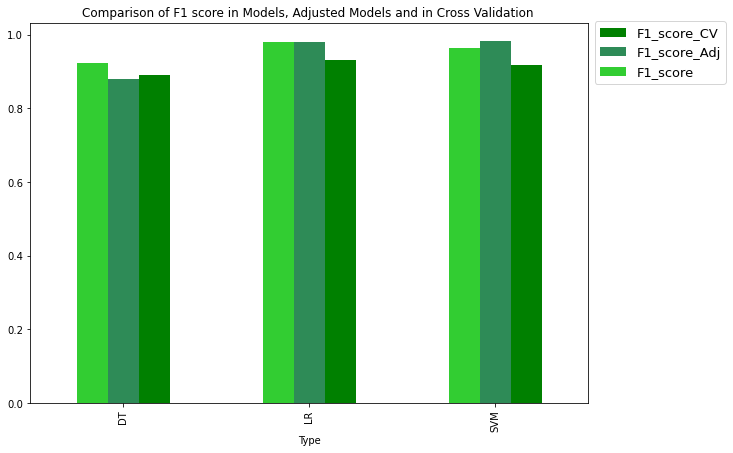

In [93]:
clf_F1_comparison_v = clf_F1_comparison.set_index('Type')

ax = clf_F1_comparison_v[['F1_score', 'F1_score_Adj', 'F1_score_CV']].plot(kind = 'bar', figsize = (10,7), color = ['Limegreen', 'Seagreen', 'green'])
ax.set_title('Comparison of F1 score in Models, Adjusted Models and in Cross Validation ')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02), prop={'size': 13}); 

**CONCLUSIONS**

If we compare the matrics results with the train/test approach, we can see that with the cross validation approach they're a bit worse, but nothing significant.

<u>Exercice 5<u>

*Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)*

<u>*MinMaxScaler*<u>

We will try to use MinMaxScaler in the same features we used Standard Scaler to see if there is any improvement. This scaler transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, usually between zero and one.

In [94]:
scaled_features_ss = ['Alcohol', 'Total phenols', 'Hue', 'Proline']

wines_minmaxscaled = wines.copy()
scaler = MinMaxScaler()
wines_minmaxscaled[scaled_features_ss] = scaler.fit_transform(wines_minmaxscaled[scaled_features_ss])
wines_minmaxscaled

Type of Wine   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0               1  0.842105        1.71  2.43               15.6        127   
1               1  0.571053        1.78  2.14               11.2        100   
2               1  0.560526        2.36  2.67               18.6        101   
3               1  0.878947        1.95  2.50               16.8        113   
4               1  0.581579        2.59  2.87               21.0        118   
..            ...       ...         ...   ...                ...        ...   
173             3  0.705263        5.65  2.45               20.5         95   
174             3  0.623684        3.91  2.48               23.0        102   
175             3  0.589474        4.28  2.26               20.0        120   
176             3  0.563158        2.59  2.37               20.0        120   
177             3  0.815789        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0         0.627586        3.06                  0.28             2.29   
1         0.575862        2.76                  0.26             1.28   
2         0.627586        3.24                  0.30             2.81   
3         0.989655        3.49                  0.24             2.18   
4         0.627586        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173       0.241379        0.61                  0.52             1.06   
174       0.282759        0.75                  0.43             1.41   
175       0.210345        0.69                  0.43             1.35   
176       0.231034        0.68                  0.53             1.46   
177       0.368966        0.76                  0.56             1.35   

     Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0               5.64  0.455285                          3.92  0.561341  
1               4.38  0.463415                          3.40  0.550642  
2               5.68  0.447154                          3.17  0.646933  
3               7.80  0.308943                          3.45  0.857347  
4               4.32  0.455285                          2.93  0.325963  
..               ...       ...                           ...       ...  
173             7.70  0.130081                          1.74  0.329529  
174             7.30  0.178862                          1.56  0.336662  
175            10.20  0.089431                          1.56  0.397290  
176             9.30  0.097561                          1.62  0.400856  
177             9.20  0.105691                          1.60  0.201141  

[178 rows x 14 columns]

In [95]:
#choose dependent (or target) variable 
y1 = wines_minmaxscaled['Type of Wine']
#choose independent variable 
X1 = wines_minmaxscaled[['Alcohol', 'Total phenols', 'Hue', 'Proline']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [96]:
dt_clf_eng = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini')
logreg_eng = LogisticRegression(dual = True, max_iter = 1000, penalty = 'l2', solver = 'liblinear')
svm_clf_eng = svm.SVC(class_weight = None, gamma = 'scale', kernel = 'linear')

dt_clf_eng.fit(X1_train, y1_train)
logreg_eng.fit(X1_train, y1_train)
svm_clf_eng.fit(X1_train, y1_train);

In [97]:
dt_y_eng = dt_clf_eng.predict(X1_test)
logreg_y_eng = logreg_eng.predict(X1_test)
svm_y_eng = svm_clf_eng.predict(X1_test)

In [98]:
f1_dt_eng = metrics.f1_score(y1_test, dt_y_eng, average='macro')
f1_lr_eng = metrics.f1_score(y1_test, logreg_y_eng, average='macro')
f1_svm_eng = metrics.f1_score(y1_test, svm_y_eng, average='macro')

In [99]:
print("F1_score:", f1_dt_eng)
print("F1_score:", f1_lr_eng)
print("F1_score:", f1_svm_eng)

F1_score: 0.8940723019670388
F1_score: 1.0
F1_score: 1.0


In [111]:
#Get the confusion matrix
cf_matrix_dt_minmax = confusion_matrix(y1_test, dt_y_eng)
print(cf_matrix_dt_minmax)

[[18  1  0]
 [ 0 22  0]
 [ 1  3  9]]


In [112]:
#Get the confusion matrix
cf_matrix_logreg_minmax = confusion_matrix(y1_test, logreg_y_eng)
print(cf_matrix_logreg_minmax)

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


In [113]:
#Get the confusion matrix
cf_matrix_svm_minmax = confusion_matrix(y1_test, svm_y_eng)
print(cf_matrix_svm_minmax)

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


In [101]:
clf_F1_comparison.insert(loc=5, column="F1_score_minmax", value=[f1_dt_eng, f1_lr_eng, f1_svm_eng])
clf_F1_comparison

Model Type  F1_score  F1_score_Adj  F1_score_CV  \
0           Decision Tree   DT  0.922005      0.878292       0.8898   
1     Logistic Regression   LR  0.979902      0.979902       0.9317   
2  Support Vector Machine  SVM  0.963234      0.983701       0.9163   

   F1_score_minmax  
0         0.894072  
1         1.000000  
2         1.000000

<u>*Log Transformation*<u>

We will try another feature engineering, the log transformation on the variables that are highly skewed as we saw before in our visualization.

One way to address the lack of normal distribution in our variables is to transform it with Log Transformation, which transform the response variable from y to log(y).

In [102]:
# log transormation on selected columns 
log_cols =['Malic acid','Magnesium','OD280/OD315 of diluted wines']

In [103]:
# add 1 to avoid error values 
wines_eng = wines_minmaxscaled.copy()
wines_eng[log_cols] = np.log(wines[log_cols] + 1 )
wines_eng

Type of Wine   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0               1  0.842105    0.996949  2.43               15.6   4.852030   
1               1  0.571053    1.022451  2.14               11.2   4.615121   
2               1  0.560526    1.211941  2.67               18.6   4.624973   
3               1  0.878947    1.081805  2.50               16.8   4.736198   
4               1  0.581579    1.278152  2.87               21.0   4.779123   
..            ...       ...         ...   ...                ...        ...   
173             3  0.705263    1.894617  2.45               20.5   4.564348   
174             3  0.623684    1.591274  2.48               23.0   4.634729   
175             3  0.589474    1.663926  2.26               20.0   4.795791   
176             3  0.563158    1.278152  2.37               20.0   4.795791   
177             3  0.815789    1.629241  2.74               24.5   4.574711   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0         0.627586        3.06                  0.28             2.29   
1         0.575862        2.76                  0.26             1.28   
2         0.627586        3.24                  0.30             2.81   
3         0.989655        3.49                  0.24             2.18   
4         0.627586        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173       0.241379        0.61                  0.52             1.06   
174       0.282759        0.75                  0.43             1.41   
175       0.210345        0.69                  0.43             1.35   
176       0.231034        0.68                  0.53             1.46   
177       0.368966        0.76                  0.56             1.35   

     Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0               5.64  0.455285                      1.593309  0.561341  
1               4.38  0.463415                      1.481605  0.550642  
2               5.68  0.447154                      1.427916  0.646933  
3               7.80  0.308943                      1.492904  0.857347  
4               4.32  0.455285                      1.368639  0.325963  
..               ...       ...                           ...       ...  
173             7.70  0.130081                      1.007958  0.329529  
174             7.30  0.178862                      0.940007  0.336662  
175            10.20  0.089431                      0.940007  0.397290  
176             9.30  0.097561                      0.963174  0.400856  
177             9.20  0.105691                      0.955511  0.201141  

[178 rows x 14 columns]

In [104]:
#choose dependent (or target) variable 
y2 = wines_eng['Type of Wine']
#choose independent variable 
X2 = wines_eng[['Alcohol', 'Malic acid', 'Magnesium', 'Total phenols', 'Hue' , 'OD280/OD315 of diluted wines', 'Proline']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [105]:
dt_clf_eng_final = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini')
logreg_eng_final = LogisticRegression(dual = True, max_iter = 1000, penalty = 'l2', solver = 'liblinear')
svm_clf_eng_final = svm.SVC(class_weight = None, gamma = 'scale', kernel = 'linear')

dt_clf_eng_final.fit(X2_train, y2_train)
logreg_eng_final.fit(X2_train, y2_train)
svm_clf_eng_final.fit(X2_train, y2_train)

SVC(kernel='linear')

In [106]:
dt_y_eng_final = dt_clf_eng_final.predict(X2_test)
logreg_y_eng_final = logreg_eng_final.predict(X2_test)
svm_y_eng_final = svm_clf_eng_final.predict(X2_test)

In [107]:
f1_dt_eng_final = metrics.f1_score(y2_test, dt_y_eng_final, average='macro')
f1_lr_eng_final = metrics.f1_score(y2_test, logreg_y_eng_final, average='macro')
f1_svm_eng_final = metrics.f1_score(y2_test, svm_y_eng_final, average='macro')

In [108]:
print("F1_score:", f1_dt_eng_final)
print("F1_score:", f1_lr_eng_final)
print("F1_score:", f1_svm_eng_final)

F1_score: 0.8677655677655678
F1_score: 0.9580600278274698
F1_score: 1.0


In [109]:
clf_F1_comparison.insert(loc=6, column="F1_score_log_transf", value=[f1_dt_eng_final, f1_lr_eng_final, f1_svm_eng_final])
clf_F1_comparison

Model Type  F1_score  F1_score_Adj  F1_score_CV  \
0           Decision Tree   DT  0.922005      0.878292       0.8898   
1     Logistic Regression   LR  0.979902      0.979902       0.9317   
2  Support Vector Machine  SVM  0.963234      0.983701       0.9163   

   F1_score_minmax  F1_score_log_transf  
0         0.894072             0.867766  
1         1.000000             0.958060  
2         1.000000             1.000000

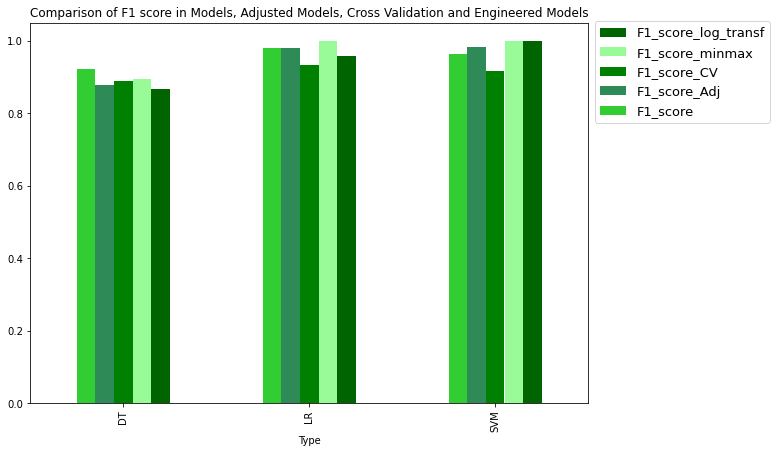

In [110]:
clf_F1_comparison_final = clf_F1_comparison.set_index('Type')

ax = clf_F1_comparison_final[['F1_score', 'F1_score_Adj', 'F1_score_CV', 'F1_score_minmax', 'F1_score_log_transf']].plot(kind = 'bar', figsize = (10,7), color = ['Limegreen', 'Seagreen', 'green', 'palegreen', 'darkgreen'])
ax.set_title('Comparison of F1 score in Models, Adjusted Models, Cross Validation and Engineered Models')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02), prop={'size': 13}); 

**FINAL CONCLUSIONS**

-We got a F1 score equal to 1 in LR and SVM models using minmaxscaler instead of Standard Scaler. We also achieved F1_score of 1 with log transformation and support vector machine. 

-A high F1 score rate means that we have a precise model, a model that is very “pure”: the positives that the model does class as positive are very likely to be correct. Our mode has also high recall, so it succeeds well in finding all the positive cases in the data.


-We didn't use Robust Scaler because we don't have many outliers.


-Best model is, in general, Support Vector Machine.


-The model performs almost equally in both train and test and also in train/test and CV so it doesn't seem to have overfitting.


-Cross Validation didn't improve our models.
